# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and sklearn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load Dataset
Load the dataset from the specified path using pandas.

In [2]:
# Load Dataset
data_path = '../EDA/processed_data.parquet'
df = pd.read_parquet(data_path)

df["Heart Attack Diagnosed"] = df["Heart Attack Diagnosed"].replace({"yes": 1, "no": 0})

# Display the first few rows of the dataframe
df.head()

C:\Users\sukhi\AppData\Local\Temp\ipykernel_8504\2646319038.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Heart Attack Diagnosed"] = df["Heart Attack Diagnosed"].replace({"yes": 1, "no": 0})


,Days with poor physical health(past 30 days),Has a personal doctor/health provider,Annual sequence number,BMI rounded to 1 decimal,Highest education level completed,Difficulty walking/climbing stairs,Computed Height in Inches,Age Group,Physical inactivity indicator,Final disposition code,...,Lifetime Asthma,Current employment status,Marital status,Seat belt usage status,Used internet in past 30 days,Prefered Race Category,Stratum weight,Age grouped in 5-year intervals,Blind or serious vision difficulty,Kidney Disease Diagnosed
0,30.0,1.0,2.013001e+09,3916.0,6.0,1.0,67.0,5.0,2.0,1100.0,...,2.0,7.0,2.0,1.0,1.0,2.0,40.197675,9.0,2.0,1.0
1,88.0,1.0,2.013001e+09,1822.0,5.0,2.0,70.0,4.0,1.0,1100.0,...,1.0,1.0,1.0,1.0,1.0,1.0,40.197675,7.0,2.0,2.0
2,3.0,1.0,2.013001e+09,2746.0,6.0,1.0,64.0,5.0,2.0,1100.0,...,1.0,1.0,1.0,1.0,1.0,1.0,40.197675,8.0,2.0,2.0
3,2.0,1.0,2.013001e+09,2197.0,4.0,2.0,64.0,5.0,1.0,1100.0,...,1.0,7.0,1.0,1.0,1.0,1.0,40.197675,9.0,2.0,2.0
4,10.0,1.0,2.013001e+09,3594.0,6.0,2.0,72.0,6.0,2.0,1100.0,...,2.0,7.0,1.0,1.0,1.0,1.0,60.319184,10.0,2.0,2.0


In [3]:
#Dividing the dataset into features and target variable
X = df.drop('Heart Attack Diagnosed', axis=1)
y = pd.DataFrame(df['Heart Attack Diagnosed'], columns=['Heart Attack Diagnosed'])

# Dimensionality Reduction
Perform dimensionality reduction using techniques such as PCA.

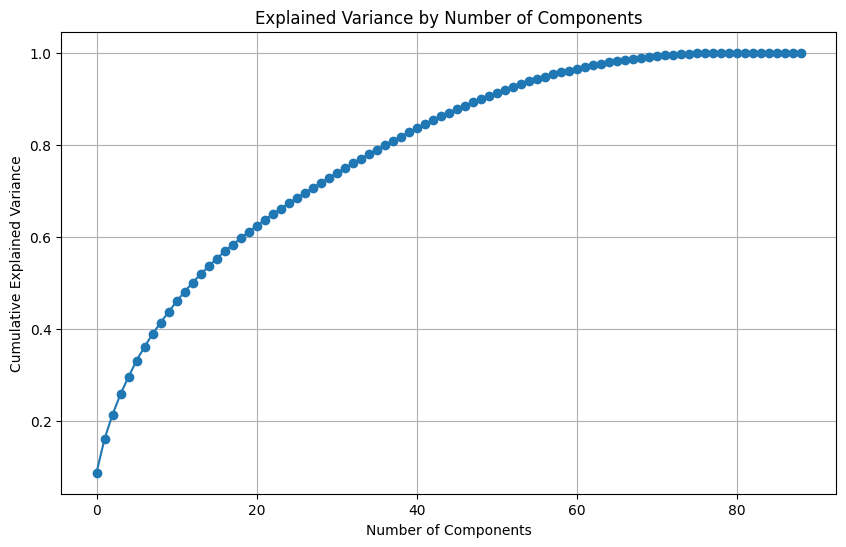

In [4]:
# Dimensionality Reduction

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Run sclaer for numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Convert the scaled data to a dataframe
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Plot the explained variance ratio to determine the best number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

# Run with components with cumulative explained variance of 95%
pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(scaled_data)

# Save the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, pca_result.shape[1] + 1)])
pca_df.to_parquet('pca_reduced_data.parquet')

# Save the Target Variable
y.to_parquet('target_variable.parquet')

# Plot UMAP Graph
Use UMAP to reduce dimensions and plot the resulting graph.

c:\Users\sukhi\anaconda3\envs\capstone\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


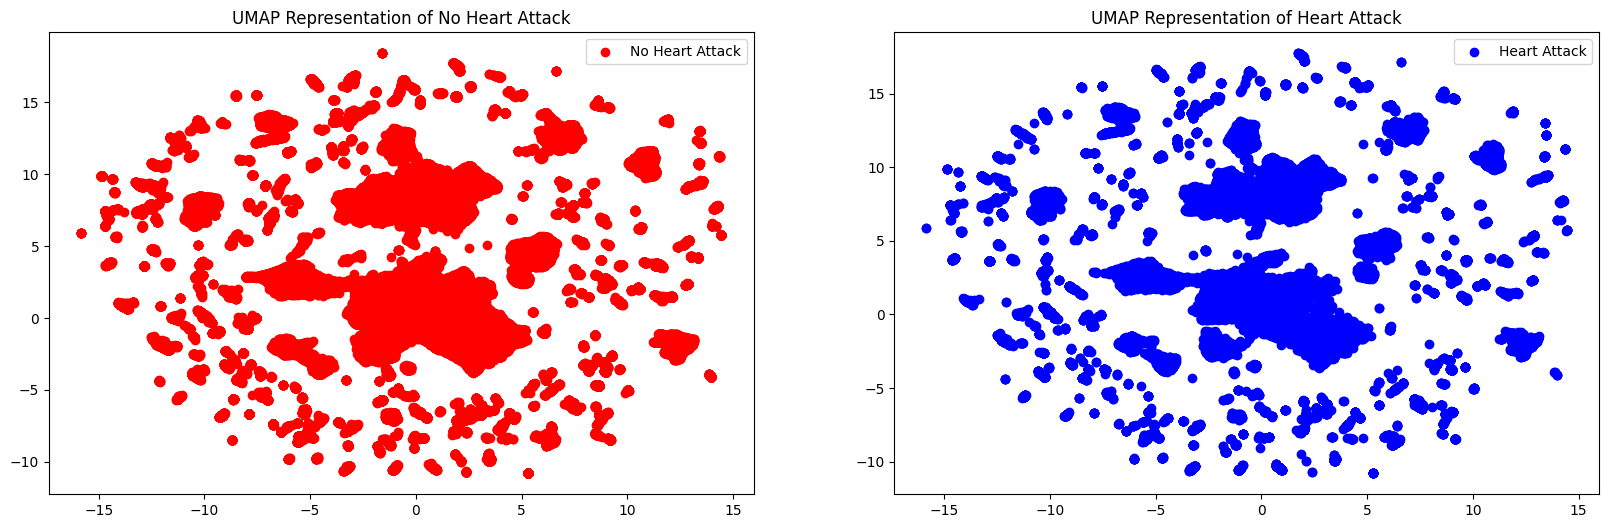

In [5]:
import umap.umap_ as umap
import seaborn as sns
reducer = umap.UMAP()
# df_sample = df.groupby("Heart Attack Diagnosed").sample(n=10000, random_state=1)
df_sample = pd.concat([pca_df, y], axis=1)
embedding = reducer.fit_transform(df_sample)
# Plot for both classes separately
X_0 = embedding[df_sample["Heart Attack Diagnosed"] == 0]
X_1 = embedding[df_sample["Heart Attack Diagnosed"] == 1]
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].scatter(X_0[:, 0], X_0[:, 1], label='No Heart Attack', c='r')
axes[0].set_title('UMAP Representation of No Heart Attack')
axes[0].legend()

axes[1].scatter(X_1[:, 0], X_1[:, 1], label='Heart Attack', c='b')
axes[1].set_title('UMAP Representation of Heart Attack')
axes[1].legend()

plt.show()